<a href="https://colab.research.google.com/github/Syntax-code/Machine-Learning/blob/master/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Mall_Customers.csv to Mall_Customers.csv
User uploaded file "Mall_Customers.csv" with length 3981 bytes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
gender = {'Male' : 0, 'Female' : 1}
df['Gender'] = [gender[item] for item in df['Gender']]

<h4>gender analysis

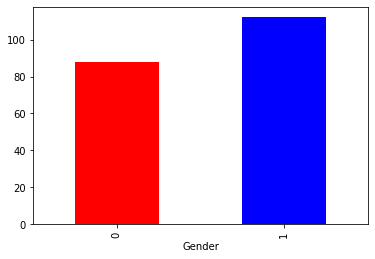

In [ ]:
by_gender = df.groupby('Gender')
by_gender.size().plot(kind='bar', color = ['red', 'blue'])

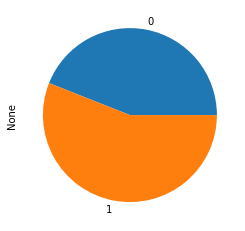

In [ ]:
by_gender.size().plot(kind='pie')

<h4> Age analysis

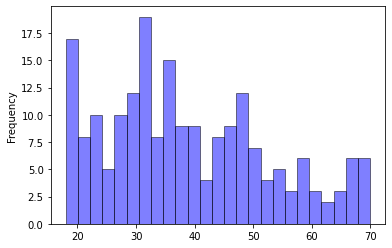

In [ ]:
df['Age'].plot(kind='hist',bins = 25, facecolor='blue', alpha=0.5, edgecolor = 'black')  #alpha = opacity , bins = partitions

{'boxes': [<matplotlib.lines.Line2D at 0x7ff2b9176278>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff2b794bcc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff2b7959780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff2b7959400>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff2b794b5c0>,
  <matplotlib.lines.Line2D at 0x7ff2b794b940>]}

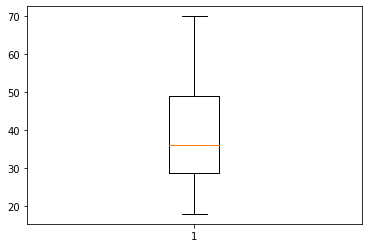

In [ ]:
plt.boxplot(df['Age'])

<h4> Income analysis

Text(0.5, 1.0, 'Age Histogram')

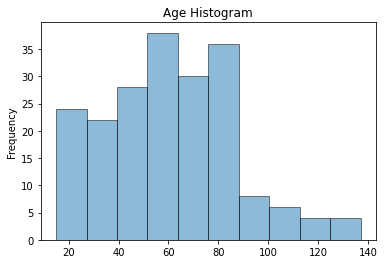

In [ ]:
df['Annual Income (k$)'].plot(kind = 'hist', bins = 10, alpha = 0.5, edgecolor = 'black')
plt.title('Age Histogram')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Annul Income Distplot')

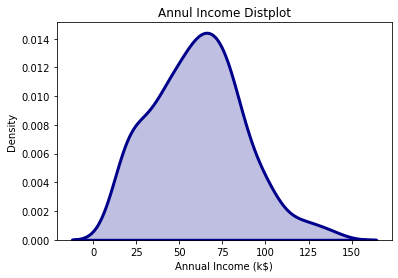

In [ ]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['Annual Income (k$)'], hist=False, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Annul Income Distplot')

<h4> Spend

Text(0.5, 1.0, 'Spending Score Boxplot')

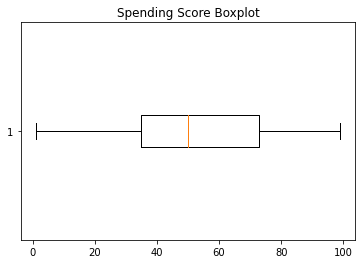

In [ ]:
plt.boxplot(df['Spending Score (1-100)'], vert = False)
plt.title('Spending Score Boxplot')

Text(0.5, 1.0, 'Spending Score Histogram')

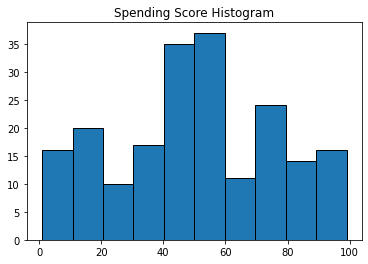

In [ ]:
plt.hist(df['Spending Score (1-100)'], edgecolor = 'black')
plt.title('Spending Score Histogram')

<h4> Kmean implemention

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = df.iloc[:, 1:]

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [ ]:
distortions = [] 
silh = []
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df)  
    pred=kmeanModel.predict(df) 
    if k != 1:
      silh.append(silhouette_score(df, pred)) 
    else :
      silh.append(0) 

    distortions.append(sum(np.min(scipy.spatial.distance.cdist(df, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(scipy.spatial.distance.cdist(df, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / df.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

<h6> Take the elbow like the start of the curve or joint of the curve 

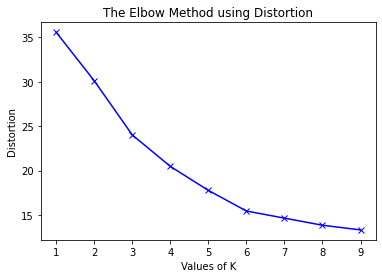

In [ ]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

<h4> Inertia: It is defined as the mean squared distance between each instance and its closest centroid. Logically, as per the definition lower the inertia better the model. In general, the KMeans package of sklearn runs the algorithm for ‘n_init’ number of times and chooses the one having the lowest inertia. This approcah has a limitation, as the number of clusters increases, closest will be the clusters from the centroids and lower will be the inertia. Therefore, in this case, it is a good idea to plot the graph of inertia as the number of clusters increase. Elbow rule is used in orde rto find the optimal number of clusters. As depicted in the following diagram, curve looks like a hand and the number of clusters to be chosen over there should be equal to 3 as after that curve reaches a plateau.

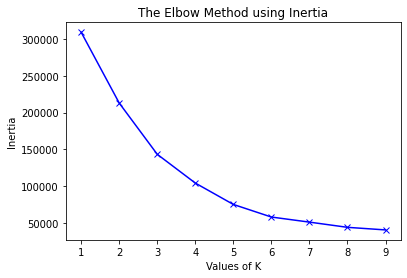

In [ ]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

<h4> Silhouette method to find k i.e the no of clusters

<h1>Silhouette Score = (b-a)/max(a,b)

where

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

.

.


where, y is the mean intra cluster distance: mean distance to the other instances in the same cluster. x depicts mean nearest cluster distance i.e. mean distance to the instances of the next closest cluster.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [ ]:
for x,y in zip(K, silh):
  print('{} : {}'.format(x, y))

1 : 0
2 : 0.29307334005502633
3 : 0.383798873822341
4 : 0.4052954330641215
5 : 0.43959178858284587
6 : 0.45205475380756527
7 : 0.43949619264530887
8 : 0.4294098819758089
9 : 0.38748694594984834


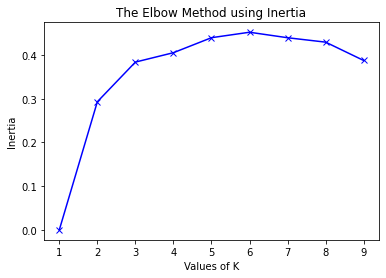

In [ ]:
plt.plot(K, silh, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

<h4> visualizing the clusters

In [57]:
kmean = KMeans(n_clusters=6).fit(df)
pred=kmeanModel.predict(df)